## Function test for widefield TRAST

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from lmfit import Model, Parameters
import h5py
import matplotlib.gridspec as gridspec
import re
import os
import sys
sys.path.insert(0, 'D:/software/')
from Biomol import HDF5_trast as t5
from Biomol import StyleTools as st
from Biomol import ImageLab as iml

In [154]:
dirname = 'D:/new trast test data/'
f = h5py.File(os.path.join(dirname,'trast_test_single.hdf5')) # Should be set relativ to a folder

file=os.path.join(dirname,'trast_test_2.hdf5')
tp = [i for i in f['004_Vesicle_1_5000NAO-noTempo_1_100CL_Air_ND1_003.fit']]
tp = np.array(tp)
print(tp)

tp = f['004_Vesicle_1_5000NAO-noTempo_1_100CL_Air_ND1_003.fit']['tp'][:]

print(tp)


    
 
 

['HDfit' 'HDtp' 'Lower Conf' 'TRAST' 'Upper Conf' 'excRate' 'fit' 'rates'
 'rawData' 'rawTp' 'residual' 'tp']
[1.000000e-01 1.375000e-01 1.875000e-01 2.625000e-01 3.500000e-01
 4.875000e-01 6.750000e-01 9.250000e-01 1.275000e+00 1.737500e+00
 2.400000e+00 3.287500e+00 4.525000e+00 6.212500e+00 8.537500e+00
 1.172500e+01 1.610000e+01 2.212500e+01 3.038750e+01 4.175000e+01
 5.736250e+01 7.880000e+01 1.082625e+02 1.487375e+02 2.043375e+02
 2.807250e+02 3.856625e+02 5.298375e+02 7.279000e+02 1.000000e+03]


In [155]:
t5.preview(file)

 
D:/new trast test data/trast_test_2.hdf5 contains 2 measurements
 
Measurement summary:
1: 004_Vesicle_1_5000NAO-noTempo_1_100CL_Air_ND1_003.fit
2: 005_Vesicle_1_5000NAO_1_100Tempo_1_100CL_Air_ND1_003.fit


In [160]:
k01=t5.pickDataset(file,key='excRate')[:,0]*1e-6 
print(k01)
ind = np.argsort(k01)
ind

[7.01079704e-07 6.99602519e-07]


array([1, 0], dtype=int64)

In [157]:
k01[ind]

array([1.000000e-01, 1.000000e-01, 1.375000e-01, 1.375000e-01,
       1.875000e-01, 1.875000e-01, 2.625000e-01, 2.625000e-01,
       3.500000e-01, 3.500000e-01, 4.875000e-01, 4.875000e-01,
       6.750000e-01, 6.750000e-01, 9.250000e-01, 9.250000e-01,
       1.275000e+00, 1.275000e+00, 1.737500e+00, 1.737500e+00,
       2.400000e+00, 2.400000e+00, 3.287500e+00, 3.287500e+00,
       4.525000e+00, 4.525000e+00, 6.212500e+00, 6.212500e+00,
       8.537500e+00, 8.537500e+00, 1.172500e+01, 1.172500e+01,
       1.610000e+01, 1.610000e+01, 2.212500e+01, 2.212500e+01,
       3.038750e+01, 3.038750e+01, 4.175000e+01, 4.175000e+01,
       5.736250e+01, 5.736250e+01, 7.880000e+01, 7.880000e+01,
       1.082625e+02, 1.082625e+02, 1.487375e+02, 1.487375e+02,
       2.043375e+02, 2.043375e+02, 2.807250e+02, 2.807250e+02,
       3.856625e+02, 3.856625e+02, 5.298375e+02, 5.298375e+02,
       7.279000e+02, 7.279000e+02, 1.000000e+03, 1.000000e+03])

In [150]:
t5.pickRate(file,'kisc')

array([11.61120853,  9.63356552])

In [151]:
k01=t5.pickDataset(file,key='TRAST')
k01

array([[205.46180191, 208.66970458, 210.67122899, 212.47677446,
        213.24811527, 214.25395454, 213.7726059 , 214.48049141,
        213.50848037, 211.99646151, 207.87150795, 210.32265456,
        208.17247936, 202.28527608, 205.8127095 , 206.98723084,
        205.75017253, 204.108257  , 203.85402548, 203.77537564,
        204.45020678, 201.45395622, 203.43311072, 202.47221364,
        201.49680892, 200.82877757, 200.6369211 , 200.59895725,
        193.1449563 , 199.03207992],
       [358.79433436, 365.57810553, 366.90105267, 370.92968532,
        373.05165534, 371.10946244, 373.07245062, 373.10213865,
        373.64188802, 372.41694339, 371.04263768, 367.80500244,
        366.54574945, 352.9101599 , 364.39197725, 362.31980121,
        361.40051969, 349.78517069, 359.56061261, 359.28520954,
        358.41788162, 357.83351378, 358.43002066, 356.5601461 ,
        356.7523915 , 348.49802002, 354.89703561, 355.33907407,
        356.1280232 , 351.82830756]])

D:/software\Biomol\HDF5_trast.py:233: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(121)
D:/software\Biomol\HDF5_trast.py:236: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(122)
D:/software\Biomol\HDF5_trast.py:238: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and 

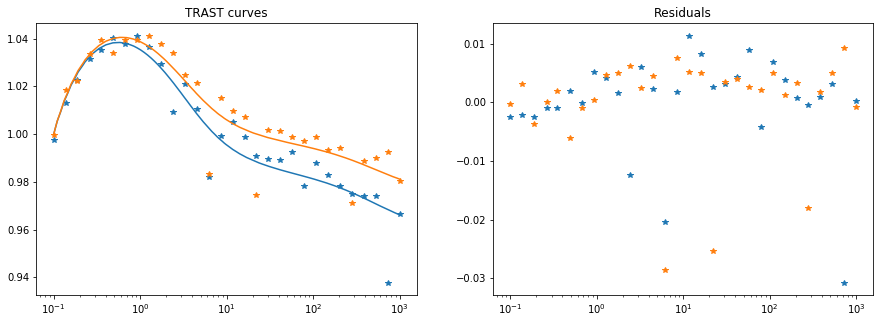

In [106]:
t5.plotAll(file)

### Open TRAST hdf5 to obtain the pulse duration

In [84]:
dirname = 'D:/new trast test data/'

f = h5py.File(os.path.join(dirname,'trast_test_2.hdf5')) # Should be set relativ to a folder
tp = [i for i in f['004_Vesicle_1_5000NAO-noTempo_1_100CL_Air_ND1_003.fit']['tp']]
tp = np.array(tp)
tp

array([1.000000e-01, 1.375000e-01, 1.875000e-01, 2.625000e-01,
       3.500000e-01, 4.875000e-01, 6.750000e-01, 9.250000e-01,
       1.275000e+00, 1.737500e+00, 2.400000e+00, 3.287500e+00,
       4.525000e+00, 6.212500e+00, 8.537500e+00, 1.172500e+01,
       1.610000e+01, 2.212500e+01, 3.038750e+01, 4.175000e+01,
       5.736250e+01, 7.880000e+01, 1.082625e+02, 1.487375e+02,
       2.043375e+02, 2.807250e+02, 3.856625e+02, 5.298375e+02,
       7.279000e+02, 1.000000e+03])

### Open CSV files containing the bleaching corrected TRAST curve

Corrected TRAST curve are calculated using Johan Tornmalm Matlab software

In [10]:
data = pd.read_csv(os.path.join(dirname,'BRANT_pH_NAO_TRAST_Export.csv'), sep=";")


### Get informations from name

In [33]:

TRAST_NAO = dict()

TRAST_NAO["File"] = data.keys()
TRAST_NAO["Date"] = np.array([da[-6:] for da in data])
TRAST_NAO["Air"] = np.array([da.find("NoAir")==-1 for da in data])*20
TRAST_NAO["DOXYL"] = np.array([da.find("DOX")!=-1 for da in data])*50


for lipid in ["POPC", "DOPC", 'POPG', 'DOPG', 'CL', "DOTAP", "DOPA"]:
    TRAST_NAO[lipid] = []
    for idx, d in enumerate(data):
        s = d.find(lipid)
        if s == 0:
            TRAST_NAO[lipid].append(100)
        elif s > 0:
            c = d.find("_",s-4, s)
            TRAST_NAO[lipid].append(int(d[c+1:s]))
        else:
            TRAST_NAO[lipid].append(0)
            
for buffer in ["_H", "NaCl",]:
    name = buffer if buffer != "_H" else "HEPES"
    TRAST_NAO[name] = []
    for idx, d in enumerate(data):
        s = d.find(buffer)
        if s == 0:
            TRAST_NAO[name].append(100)
        elif s > 0:
            c = d.find("mM",s,)
            if int(d[s+len(buffer)]) == 0:
                a = int(d[s+len(buffer):c])/10
            else:
                a = int(d[s+len(buffer):c])
            TRAST_NAO[name].append(a)
        else:
            TRAST_NAO[name].append(0)



### Normalize TRAST curve with low pH (1.8)

In [34]:
norm = 'DOTAP_pH74_190222'#'POPC_pH18_190225'
norm = 'POPC_pH18_190225'

data_n = data.copy()
for d in data:
    data_n[d+"_Corr"]=data[d]/data[norm]
    if d != norm:
        data_n = data_n.drop(d, axis=1)
data_n = data_n.drop(norm, axis=1)

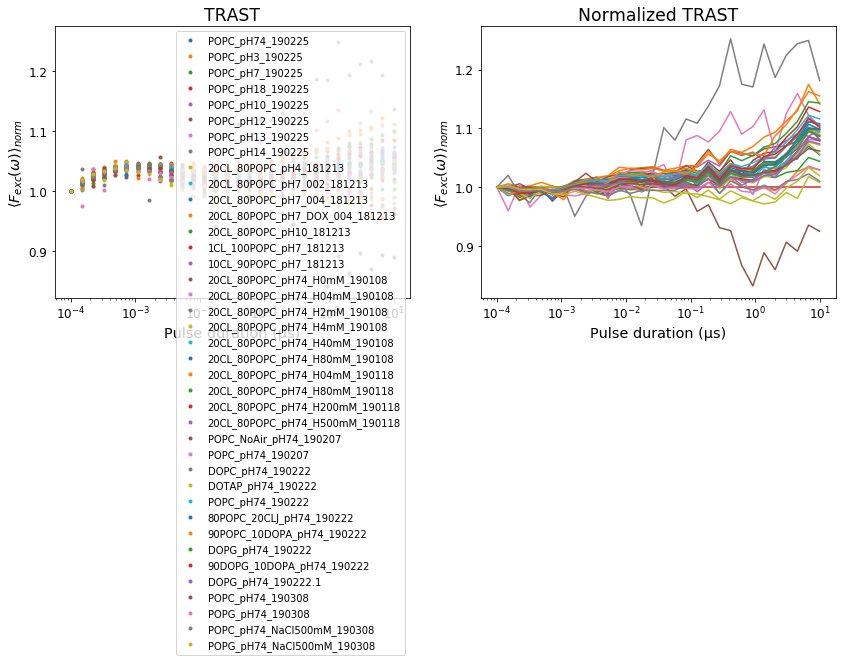

In [35]:
fig = plt.figure(figsize=(14,5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
plt.rc('xtick',labelsize="large")
plt.rc('ytick',labelsize="large")
    
[ax2.semilogx(tp,data_n[d]/data_n[d][0], label=d) for d in data_n if "_Corr" in d]
[ax1.semilogx(tp, data[d]/data[d][0],".", label=d ) for d in data]
ax1.set_title("TRAST", fontsize="xx-large")
ax2.set_title("Normalized TRAST", fontsize="xx-large")
for a in fig.axes:
    a.set_xlabel("Pulse duration (µs)", fontsize="x-large")
    a.set_ylabel(r"$\langle F_{exc}(\omega)\rangle_{norm}$", fontsize="x-large")
ax1.legend()
    

### Fit function definition

In [36]:
### Non-normalized curve attempt
  
def TR_PT(x, k01, tau, kisc, kt, kox, kred, A, kp, F0):
    """Fit for NAO Trast"""
    
    kisc = kisc * 1e-3
    kt = kisc * 1e-3
    
    tp = x
    # Set k10 from the lifetime
    k10 = 1/tau*1e3 # k10 in [us^-1]
    
    # Set rates and tau for S1
    lambda1Inv = 1 / (k01 + k10 + kisc)
    # Set rates and tau for T1
    kisceq = kisc * k01 * lambda1Inv
    lambda2Inv = 1 / (kisceq + kt)
    # Set rates and tau for OX
    koxeq = kox * kisceq / (kisceq + kt)
    lambda3Inv = 1 / (koxeq + kred)
    
    vec = 1
    
    F = (lambda1Inv * (1 / tp)) * (np.exp(-(k01 + k10 + kisc) * tp) -1)
    F = F - ((kisceq * (lambda2Inv)**2) * (1 / tp)) * (np.exp(-(kisceq + kt) * tp)-1)
    F = F - ((kt * koxeq * lambda2Inv * (lambda3Inv)**2) * (1 / tp)) * (np.exp(-(koxeq + kred) * tp)-1)    
    F = F + (kt * lambda2Inv * kred * lambda3Inv) * vec

    F= F * ((k01 * k10 * lambda1Inv) * vec)

    F = F0 + F * (vec * (1 + A *(1 - np.exp(-kp * tp))))
    
    return F

In [37]:
### Normalized curve fit

def TR_PT_corr(x, A, kp, F0):
    """Fit for NAO Trast"""

    
    tp = x


    F = F0 + (1 + A *(1 - np.exp(-kp * tp)))
    
    return F


NAOmodel1 = Model(TR_PT_corr)


In [44]:


params = Parameters()
params.add('A', value=0.17922723, min=0, max=10,)
params.add('kp', value=1e-5, min=0, max=100)
params.add('F0', value=1, min=0, max=1000)

result_tot = []
Name_tot = []
pH_tot = []

# Display all fits
display = False

for da in data_n:
    d = data_n[da]
    
    result = NAOmodel1.fit(d/d[0], params, x=tp, method="least_squares")
    
    result_tot.append(result)
    Name_tot.append(da)
    pH = int(re.search(r'pH\d+', da).group()[2:])
    pH = pH if pH <= 14 else pH/10
    pH_tot.append(pH)
    print('File processed: ', da, '\n')
    #print(result.fit_report())

    if display:
        gs = gridspec.GridSpec(4, 1)
        ax1 = plt.subplot(gs[0:3,:])
        ax1.semilogx(tp, d/d[0], 'b.')
        #plt.semilogx(tp, result.init_fit, 'k--')
        ax1.semilogx(tp, result.best_fit, 'r-', label=da)
        ax1.set_ylabel("Relative F [-]", fontsize="x-large")
        ax1.set_title("pH %g" % pH, fontsize="x-large")
        ax2 = plt.subplot(gs[-1,:])
        ax2.semilogx(tp, result.residual, 'r', )
        ax2.set_ylabel("Res [-]", fontsize="x-large")
        ax2.set_xlabel("Pulse width [µs]",fontsize="x-large")

        ax1.legend()
        plt.show()
        # <end examples/doc_model_gaussian.py>


File processed:  POPC_pH74_190225_Corr 

File processed:  POPC_pH3_190225_Corr 

File processed:  POPC_pH7_190225_Corr 

File processed:  POPC_pH18_190225_Corr 

File processed:  POPC_pH10_190225_Corr 

File processed:  POPC_pH12_190225_Corr 

File processed:  POPC_pH13_190225_Corr 

File processed:  POPC_pH14_190225_Corr 

File processed:  20CL_80POPC_pH4_181213_Corr 

File processed:  20CL_80POPC_pH7_002_181213_Corr 

File processed:  20CL_80POPC_pH7_004_181213_Corr 

File processed:  20CL_80POPC_pH7_DOX_004_181213_Corr 

File processed:  20CL_80POPC_pH10_181213_Corr 

File processed:  1CL_100POPC_pH7_181213_Corr 

File processed:  10CL_90POPC_pH7_181213_Corr 

File processed:  20CL_80POPC_pH74_H0mM_190108_Corr 

File processed:  20CL_80POPC_pH74_H04mM_190108_Corr 

File processed:  20CL_80POPC_pH74_H2mM_190108_Corr 

File processed:  20CL_80POPC_pH74_H4mM_190108_Corr 

File processed:  20CL_80POPC_pH74_H40mM_190108_Corr 

File processed:  20CL_80POPC_pH74_H80mM_190108_Corr 

File pr

In [45]:
kp_tot = []
A_tot = []
A_stderr = []
kp_stderr = []

for i in result_tot:
    kp_tot.append(i.params['kp'].value)
    A_tot.append(i.params['A'].value)
    kp_stderr.append(i.params['kp'].stderr)
    A_stderr.append(i.params['A'].stderr)

In [46]:


pH = np.array(pH_tot)
kp = np.array(kp_tot)
A = np.array(A_tot)

A = A[pH>2]
kp = kp[pH>2]
pH = pH[pH>2]

In [47]:
s = np.argsort(pH)

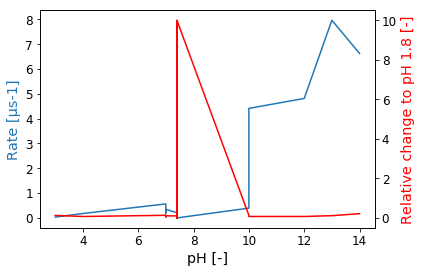

In [48]:
ax1 = plt.subplot(111)
line, = ax1.plot(pH[s], kp[s], label="kp")

ax2 = plt.twinx(ax1)
ax2.plot(pH[s], A[s], "r", label="A")
ax2.set_ylabel("Relative change to pH 1.8 [-]", fontsize="x-large", color="r")
ax1.set_xlabel("pH [-]",fontsize="x-large")
_ = ax1.set_ylabel("Rate [µs-1]",fontsize="x-large", color=line.get_color())
#ax1.figure.legend()
#ax2.legend()

In [49]:
TRAST_NAO["pH"] = np.array(pH_tot)
TRAST_NAO["kp"] = np.array(kp_tot)
TRAST_NAO["kp_stderr"] = np.array(kp_stderr)
TRAST_NAO["A"] = np.array(A_tot)
TRAST_NAO["A_stderr"] = np.array(A_stderr)


df = pd.DataFrame(data=TRAST_NAO)
df

,File,Date,Air,DOXYL,POPC,DOPC,POPG,DOPG,CL,DOTAP,DOPA,HEPES,NaCl,pH,kp,kp_stderr,A,A_stderr
0,POPC_pH74_190225,190225,20,0,100,0,0,0,0,0,0,0.0,0,7.4,4.536841e-01,0.140489,6.045545e-02,0.00710616
1,POPC_pH3_190225,190225,20,0,100,0,0,0,0,0,0,0.0,0,3.0,3.220121e-02,0.136943,1.249978e-01,0.4664
2,POPC_pH7_190225,190225,20,0,100,0,0,0,0,0,0,0.0,0,7.0,2.986799e-01,0.125008,4.786121e-02,0.00871916
3,POPC_pH18_190225,190225,20,0,100,0,0,0,0,0,0,0.0,0,1.8,3.051809e-10,None,5.469688e-06,None
4,POPC_pH10_190225,190225,20,0,100,0,0,0,0,0,0,0.0,0,10.0,4.416013e+00,1.07333,7.344593e-02,0.00499422
5,POPC_pH12_190225,190225,20,0,100,0,0,0,0,0,0,0.0,0,12.0,4.814140e+00,1.18643,7.283979e-02,0.00499922
6,POPC_pH13_190225,190225,20,0,100,0,0,0,0,0,0,0.0,0,13.0,7.968132e+00,2.45337,1.134945e-01,0.00953604
7,POPC_pH14_190225,190225,20,0,100,0,0,0,0,0,0,0.0,0,14.0,6.631602e+00,1.56542,2.140376e-01,0.0138731
8,20CL_80POPC_pH4_181213,181213,20,0,80,0,0,0,20,0,0,0.0,0,4.0,1.774394e-01,0.0949609,7.287826e-02,0.0211833
9,20CL_80POPC_pH7_002_181213,181213,20,0,80,0,0,0,20,0,0,0.0,0,7.0,1.981077e-01,0.0862733,1.089072e-01,0.0245376


In [50]:
df.to_excel(os.path.join(dirname,'NAO_NormTRAST_pH1o8.xlsx'))

In [476]:
df.to_csv(os.path.join(dirname,"Test.csv"))

\\begin{tabular}{llrrrrrrrrrrrrlrl}\n\\toprule\n                           File &    Date &  Air &  DOXYL &  POPC &  DOPC &  POPG &  DOPG &  CL &  DOTAP &  HEPES &  NaCl &    pH &            kp & kp\\_stderr &             A &    A\\_stderr \\\\\n\\midrule\n               POPC\\_pH74\\_190225 &  190225 &   20 &      0 &   100 &     0 &     0 &     0 &   0 &      0 &    0.0 &     0 &   7.4 &  5.413285e+00 &   1.29735 &  5.225237e-02 &  0.00346771 \\\\\n                POPC\\_pH3\\_190225 &  190225 &   20 &      0 &   100 &     0 &     0 &     0 &   0 &      0 &    0.0 &     0 &   3.0 &  8.342516e+00 &    5.8974 &  2.363415e-02 &  0.00455314 \\\\\n                POPC\\_pH7\\_190225 &  190225 &   20 &      0 &   100 &     0 &     0 &     0 &   0 &      0 &    0.0 &     0 &   7.0 &  6.530637e+00 &   2.24367 &  3.927425e-02 &   0.0037071 \\\\\n               POPC\\_pH18\\_190225 &  190225 &   20 &      0 &   100 &     0 &     0 &     0 &   0 &      0 &    0.0 &     0 &   1.8 &  2.389258e-11 &      None &  6.331883e-07 &        None \\\\\n               POPC\\_pH10\\_190225 &  190225 &   20 &      0 &   100 &     0 &     0 &     0 &   0 &      0 &    0.0 &     0 &  10.0 &  6.961706e+00 &   1.25015 &  8.480692e-02 &  0.00417428 \\\\\n               POPC\\_pH12\\_190225 &  190225 &   20 &      0 &   100 &     0 &     0 &     0 &   0 &      0 &    0.0 &     0 &  12.0 &  6.927448e+00 &   1.31274 &  8.642906e-02 &  0.00448998 \\\\\n               POPC\\_pH13\\_190225 &  190225 &   20 &      0 &   100 &     0 &     0 &     0 &   0 &      0 &    0.0 &     0 &  13.0 &  8.822340e+00 &   2.57034 &  1.295714e-01 &   0.0102723 \\\\\n               POPC\\_pH14\\_190225 &  190225 &   20 &      0 &   100 &     0 &     0 &     0 &   0 &      0 &    0.0 &     0 &  14.0 &  7.234996e+00 &   1.70988 &  2.309101e-01 &   0.0149381 \\\\\n         20CL\\_80POPC\\_pH4\\_181213 &  181213 &   20 &      0 &    80 &     0 &     0 &     0 &  20 &      0 &    0.0 &     0 &   4.0 &  1.359976e+00 &  0.434733 &  4.170798e-02 &   0.0041304 \\\\\n     20CL\\_80POPC\\_pH7\\_002\\_181213 &  181213 &   20 &      0 &    80 &     0 &     0 &     0 &  20 &      0 &    0.0 &     0 &   7.0 &  1.900103e+00 &  0.540852 &  6.387125e-02 &  0.00542487 \\\\\n     20CL\\_80POPC\\_pH7\\_004\\_181213 &  181213 &   20 &      0 &    80 &     0 &     0 &     0 &  20 &      0 &    0.0 &     0 &   7.0 &  1.553578e+00 &  0.407768 &  6.942149e-02 &  0.00555581 \\\\\n 20CL\\_80POPC\\_pH7\\_DOX\\_004\\_181213 &  181213 &   20 &     50 &    80 &     0 &     0 &     0 &  20 &      0 &    0.0 &     0 &   7.0 &  2.018463e+00 &  0.383728 &  1.152735e-01 &  0.00650022 \\\\\n        20CL\\_80POPC\\_pH10\\_181213 &  181213 &   20 &      0 &    80 &     0 &     0 &     0 &  20 &      0 &    0.0 &     0 &  10.0 &  1.521726e+00 &  0.279911 &  1.077516e-01 &  0.00605784 \\\\\n         1CL\\_100POPC\\_pH7\\_181213 &  181213 &   20 &      0 &   100 &     0 &     0 &     0 &   1 &      0 &    0.0 &     0 &   7.0 &  1.441267e+00 &  0.339154 &  9.872272e-02 &  0.00714603 \\\\\n         10CL\\_90POPC\\_pH7\\_181213 &  181213 &   20 &      0 &    90 &     0 &     0 &     0 &  10 &      0 &    0.0 &     0 &   7.0 &  1.978532e+00 &  0.449759 &  7.942048e-02 &  0.00536549 \\\\\n   20CL\\_80POPC\\_pH74\\_H0mM\\_190108 &  190108 &   20 &      0 &    80 &     0 &     0 &     0 &  20 &      0 &    0.0 &     0 &   7.4 &  1.029239e+01 &   3.25235 &  5.635145e-02 &  0.00482834 \\\\\n  20CL\\_80POPC\\_pH74\\_H04mM\\_190108 &  190108 &   20 &      0 &    80 &     0 &     0 &     0 &  20 &      0 &    0.4 &     0 &   7.4 &  1.697264e+01 &   8.58344 &  4.615562e-02 &  0.00629568 \\\\\n   20CL\\_80POPC\\_pH74\\_H2mM\\_190108 &  190108 &   20 &      0 &    80 &     0 &     0 &     0 &  20 &      0 &    2.0 &     0 &   7.4 &  4.804538e+00 &   1.19726 &  5.036672e-02 &  0.00349572 \\\\\n   20CL\\_80POPC\\_pH74\\_H4mM\\_190108 &  190108 &   20 &      0 &    80 &     0 &     0 &     0 &  20 &      0 &    4.0 &     0 &   7.4 &  3.537187e+00 &    1.1958 &  4.709547e-02 &  0.00451416 \\\\\n  20CL\\_80POPC\\_pH74\\_H40mM\\_190108 &  190108 &   20 &      0 &    80 &     0 &     0 &     0 &  20 &      0 &   40.0 &     0 &   7.4 &  1.867241e+00 &  0.477719 &  6.399359e-02 &  0.00489394 \\\\\n  20CL\\_80POPC\\_pH74\\_H80mM\\_190108 &  190108 &   20 &      0 &    80 &     0 &     0 &     0 &  20 &      0 &   80.0 &     0 &   7.4 &  1.574096e+00 &  0.379374 &  7.776010e-02 &  0.00570581 \\\\\n  20CL\\_80POPC\\_pH74\\_H04mM\\_190118 &  190118 &   20 &      0 &    80 &     0 &     0 &     0 &  20 &      0 &    0.4 &     0 &   7.4 &  6.053633e+00 &   2.04924 &  5.964739e-02 &  0.00556411 \\\\\n  20CL\\_80POPC\\_pH74\\_H80mM\\_190118 &  190118 &   20 &      0 &    80 &     0 &     0 &     0 &  20 &      0 &   80.0 &     0 &   7.4 &  1.398087e+00 &  0.306469 &  7.365420e-02 &  0.00498481 \\\\\n 20CL\\_80POPC\\_pH74\\_H200mM\\_190118 &  190118 &   20 &      0 &    80 &     0 &     0 &     0 &  20 &      0 &  200.0 &     0 &   7.4 &  1.268754e+00 &  0.292829 &  5.904481e-02 &  0.00425935 \\\\\n 20CL\\_80POPC\\_pH74\\_H500mM\\_190118 &  190118 &   20 &      0 &    80 &     0 &     0 &     0 &  20 &      0 &  500.0 &     0 &   7.4 &  1.149931e+00 &  0.283289 &  5.351108e-02 &  0.00417512 \\\\\n         POPC\\_NoAir\\_pH74\\_190207 &  190207 &    0 &      0 &   100 &     0 &     0 &     0 &   0 &      0 &    0.0 &     0 &   7.4 &  3.910624e-12 &      None &  7.268875e-08 &        None \\\\\n               POPC\\_pH74\\_190207 &  190207 &   20 &      0 &   100 &     0 &     0 &     0 &   0 &      0 &    0.0 &     0 &   7.4 &  1.341584e+00 &  0.318254 &  6.419788e-02 &  0.00472605 \\\\\n               DOPC\\_pH74\\_190222 &  190222 &   20 &      0 &     0 &   100 &     0 &     0 &   0 &      0 &    0.0 &     0 &   7.4 &  1.963953e+00 &  0.413254 &  7.848627e-02 &  0.00491174 \\\\\n              DOTAP\\_pH74\\_190222 &  190222 &   20 &      0 &     0 &     0 &     0 &     0 &   0 &    100 &    0.0 &     0 &   7.4 &  3.051809e-10 &      None &  5.469688e-06 &        None \\\\\n               POPC\\_pH74\\_190222 &  190222 &   20 &      0 &   100 &     0 &     0 &     0 &   0 &      0 &    0.0 &     0 &   7.4 &  1.740871e+00 &  0.353068 &  8.607253e-02 &   0.0052562 \\\\\n       80POPC\\_20CLJ\\_pH74\\_190222 &  190222 &   20 &      0 &    80 &     0 &     0 &     0 &  20 &      0 &    0.0 &     0 &   7.4 &  1.561591e+00 &  0.341797 &  7.018095e-02 &    0.004681 \\\\\n      90POPC\\_10DOPA\\_pH74\\_190222 &  190222 &   20 &      0 &    90 &     0 &     0 &     0 &   0 &      0 &    0.0 &     0 &   7.4 &  1.845656e+00 &  0.395382 &  1.170778e-01 &  0.00750595 \\\\\n               DOPG\\_pH74\\_190222 &  190222 &   20 &      0 &     0 &     0 &     0 &   100 &   0 &      0 &    0.0 &     0 &   7.4 &  1.503743e+00 &  0.319857 &  6.538544e-02 &  0.00425672 \\\\\n      90DOPG\\_10DOPA\\_pH74\\_190222 &  190222 &   20 &      0 &     0 &     0 &     0 &    90 &   0 &      0 &    0.0 &     0 &   7.4 &  1.748034e+00 &  0.319385 &  8.555468e-02 &  0.00470473 \\\\\n             DOPG\\_pH74\\_190222.1 &  0222.1 &   20 &      0 &     0 &     0 &     0 &   100 &   0 &      0 &    0.0 &     0 &   7.4 &  1.005904e+00 &  0.261981 &  6.119635e-02 &  0.00514674 \\\\\n               POPC\\_pH74\\_190308 &  190308 &   20 &      0 &   100 &     0 &     0 &     0 &   0 &      0 &    0.0 &     0 &   7.4 &  5.464276e+00 &   1.33058 &  4.911941e-02 &  0.00331067 \\\\\n               POPG\\_pH74\\_190308 &  190308 &   20 &      0 &     0 &     0 &   100 &     0 &   0 &      0 &    0.0 &     0 &   7.4 &  6.190387e+00 &   3.47071 &  2.161190e-02 &    0.003336 \\\\\n     POPC\\_pH74\\_NaCl500mM\\_190308 &  190308 &   20 &      0 &   100 &     0 &     0 &     0 &   0 &      0 &    0.0 &   500 &   7.4 &  7.637281e+00 &   5.87306 &  2.100987e-02 &  0.00441473 \\\\\n     POPG\\_pH74\\_NaCl500mM\\_190308 &  190308 &   20 &      0 &     0 &     0 &   100 &     0 &   0 &      0 &    0.0 &   500 &   7.4 &  6.607991e-01 &  0.981357 &  1.627466e-02 &  0.00839989 \\\\\n\\bottomrule\n\\end{tabular}\n

In [6]:
from IPython.display import clear_output

from matplotlib import pyplot as plt
import collections


def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

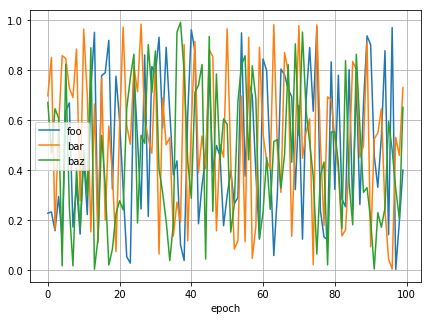

In [7]:
data = collections.defaultdict(list)
for i in range(100):
    data['foo'].append(np.random.random())
    data['bar'].append(np.random.random())
    data['baz'].append(np.random.random())
    live_plot(data)